In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from models.EchoStateNetwork import EchoStateNetwork

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [15]:
loaded_dataset = np.load("out/ff_dataset_40.npz")

X_dataset = loaded_dataset["X_dataset"]
Y_dataset = loaded_dataset["Y_dataset"]

print(X_dataset.shape)
print(Y_dataset.shape)

(32, 1228, 3)
(32, 1228)


In [16]:
real_videos = X_dataset[Y_dataset[:, 0] == 0]  # Videos with target 0
fake_videos = X_dataset[Y_dataset[:, 0] == 1]  # Videos with target 1

# Calculate the mean EAR and Δ EAR for real and fake videos
mean_ear_real = np.mean(real_videos[:, :, 0], axis=0)  # Assuming EAR is feature 0
mean_delta_ear_real = np.mean(real_videos[:, :, 1], axis=0)  # Assuming Δ EAR is feature 1

mean_ear_fake = np.mean(fake_videos[:, :, 0], axis=0)
mean_delta_ear_fake = np.mean(fake_videos[:, :, 1], axis=0)

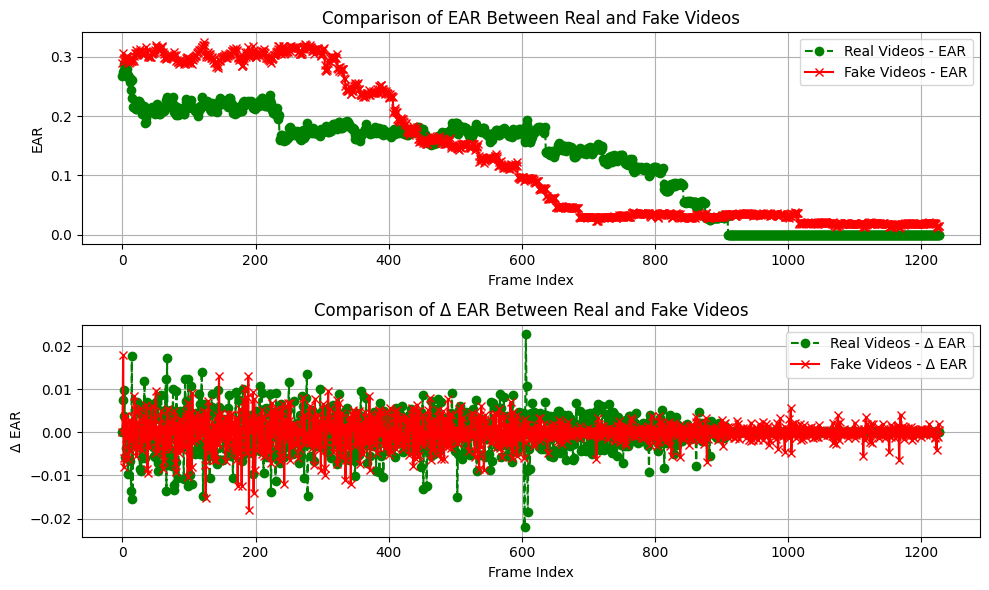

In [17]:
# Plot the comparison
plt.figure(figsize=(10, 6))

# EAR comparison
plt.subplot(2, 1, 1)
plt.plot(mean_ear_real, label='Real Videos - EAR', color='green', linestyle='--', marker='o')
plt.plot(mean_ear_fake, label='Fake Videos - EAR', color='red', linestyle='-', marker='x')
plt.title('Comparison of EAR Between Real and Fake Videos')
plt.xlabel('Frame Index')
plt.ylabel('EAR')
plt.legend()
plt.grid()

# Δ EAR comparison
plt.subplot(2, 1, 2)
plt.plot(mean_delta_ear_real, label='Real Videos - Δ EAR', color='green', linestyle='--', marker='o')
plt.plot(mean_delta_ear_fake, label='Fake Videos - Δ EAR', color='red', linestyle='-', marker='x')
plt.title('Comparison of Δ EAR Between Real and Fake Videos')
plt.xlabel('Frame Index')
plt.ylabel('Δ EAR')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

/var/folders/7t/tn7d7_7x0294gvz7svhdqz480000gn/T/ipykernel_16440/1827465359.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([EAR_values[target_labels == 0], EAR_values[target_labels == 1]],


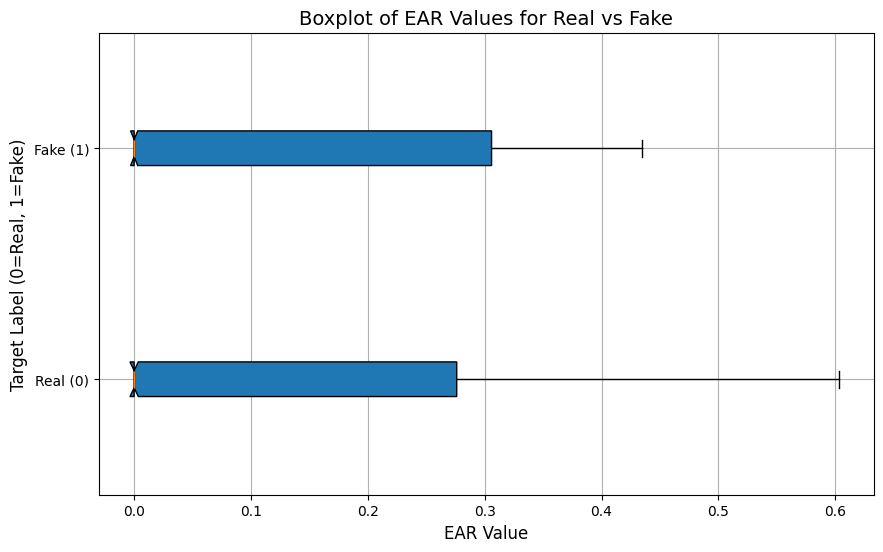

In [18]:
# Step 1: Extract EAR values from X_dataset (feature 0, index 0 of the 3rd axis)
EAR_values = X_dataset[:, :, 0].flatten()  # Flatten the EAR values to a 1D array

# Step 2: Flatten the target labels
target_labels = Y_dataset.flatten()  # Flatten the target labels to a 1D array

# Step 3: Create a boxplot for EAR values by target label
plt.figure(figsize=(10, 6))
plt.boxplot([EAR_values[target_labels == 0], EAR_values[target_labels == 1]],
            labels=['Real (0)', 'Fake (1)'], patch_artist=True, notch=True, vert=False)

# Title and labels
plt.title('Boxplot of EAR Values for Real vs Fake', fontsize=14)
plt.xlabel('EAR Value', fontsize=12)
plt.ylabel('Target Label (0=Real, 1=Fake)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

In [19]:
# Split train and test data

# Step 1: Train-test split by video
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42, shuffle=True)

In [20]:
# Step 2: Flatten train and test sets
X_train_flat = X_train.reshape(-1, 3)
Y_train_flat = Y_train.reshape(-1, 1)

X_test_flat = X_test.reshape(-1, 3)
Y_test_flat = Y_test.reshape(-1, 1)

In [21]:
# Train the ESN
esn = EchoStateNetwork(reservoir_size=100, input_dim=3)
esn.train(X_train_flat, Y_train_flat)

In [22]:
# Predict on test data
predictions = esn.predict(X_test_flat)

print("Predictions shape:", predictions.shape)

Predictions shape: (8596, 1)


In [23]:
# Convert predictions to binary (0 or 1) using a threshold
predictions_binary = (predictions > 0.5).astype(int)  # Threshold at 0.5

# Calculate accuracy
accuracy = accuracy_score(Y_test_flat, predictions_binary)
print("Accuracy:", accuracy)

Accuracy: 0.34865053513261984


In [24]:
# Calculate MSE
mse = mean_squared_error(Y_test_flat, predictions)
print("Mean Squared Error:", mse)

# Calculate R² score
r2 = r2_score(Y_test_flat, predictions)
print("R² Score:", r2)

Mean Squared Error: 0.5661044185871067
R² Score: -1.7739116510768227


In [27]:
predictions = esn.predict(X_test[5])

binary_predictions = (predictions > 0.5).astype(int)

# Step 4: Final Decision: Average predictions to decide "Real" or "Fake"
average_prediction = np.mean(binary_predictions)
if average_prediction > 0.5:
    print("The video is FAKE.")
else:
    print("The video is REAL.")

print("Frame-wise Predictions:", binary_predictions)

The video is REAL.
Frame-wise Predictions: [[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [28]:
Y_test[5]

array([0, 0, 0, ..., 0, 0, 0])